<a href="https://colab.research.google.com/github/GazalaSayyad/spacy-Name-Entity-Recognition/blob/master/Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
data=pd.read_excel('newsData.xls')

In [0]:
data.head()

,Post Link,Post Order in Thread,Author,Post Publication Date,Title,Text,Language,External Links,Mentioned Persons (positive),Mentioned Persons (negative),Mentioned Persons (neutral),Mentioned Persons (none),Mentioned Locations,Mentioned Organizations (positive),Mentioned Organizations (negative),Mentioned Organizations (neutral),Mentioned Organizations (none),Thread Link,Title.1,Section Link,Section Title,Thread Publication Date,Comments Count,Participants Count,Site Type,Site Name,Site Country,Main Image,Performance Score,Rating
0,http://omgili.com/ri/.wHSUbtEfZSbaqzVQLqf6K5IO...,0,NaN,2018-11-13T01:00:00.000+02:00,PRRSV surveillance. How we could track PRRS co...,follow 2 Like\nIn previous articles we reviewe...,english,NaN,NaN,NaN,NaN,"wang ,","china , north america , germany , spain ,",NaN,NaN,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZSbaqzVQLqf6K5IO...,PRRSV surveillance. How we could track PRRS co...,https://www.pig333.com/rss/home,Pig to pork,2018-11-13T01:00:00.000+02:00,0,0,news,pig333.com,ES,https://www.pig333.com/3tres3_common/art/pig33...,0,NaN
1,http://omgili.com/ri/.wHSUbtEfZRDcqHtpKs66rN2v...,0,NaN,2018-11-13T16:47:00.000+02:00,Ant Download Manager Pro 1.10.2 Build 54254 + ...,Visit TutsGalaxy.com for tutorials & free cour...,english,NaN,NaN,NaN,NaN,"slimjet ,",NaN,NaN,NaN,NaN,"mozilla firefox , google chrome ,",http://omgili.com/ri/.wHSUbtEfZRDcqHtpKs66rN2v...,Ant Download Manager Pro 1.10.2 Build 54254 + ...,http://www.limetorrents.cc/rss/,LimeTorrents.info - RSS Feed,2018-11-13T16:47:00.000+02:00,0,0,blogs,limetorrents.info,CC,NaN,0,NaN
2,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,13,Anonymous,2018-11-13T17:20:00.000+02:00,NaN,I'm so sorry you had to witness this,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,NaN,0,NaN
3,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,15,Anonymous,2018-11-13T17:31:00.000+02:00,NaN,yikers&cringers,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,NaN,0,NaN
4,http://omgili.com/ri/2wGaacqxApv27k8wLB.qKT5en...,0,NaN,2018-11-13T18:53:00.000+02:00,Shiv Bhola Bhala Gora Beth Bolero Mein Shiv Bhole,Home / Music / shiv bhola bhala gora beth bole...,english,"http://data-vocabulary.org/Breadcrumb , http:/...",NaN,NaN,NaN,"shiv bhola bhala gora beth bolero ,",NaN,NaN,NaN,NaN,NaN,http://omgili.com/ri/2wGaacqxApv27k8wLB.qKT5en...,Shiv Bhola Bhala Gora Beth Bolero Mein Shiv Bhole,http://musik.axom.in/feed,Download Free Audio mp3 songs | musika.axom.in,2018-11-13T18:53:00.000+02:00,0,0,news,axom.in,IN,http://musik.axom.in/images/mp3-songs-download...,0,NaN


In [0]:
data.isnull().sum()

Post Link                               0
Post Order in Thread                    0
Author                                 16
Post Publication Date                   0
Title                                  63
Text                                    1
Language                                0
External Links                         82
Mentioned Persons (positive)          100
Mentioned Persons (negative)           98
Mentioned Persons (neutral)           100
Mentioned Persons (none)               84
Mentioned Locations                    88
Mentioned Organizations (positive)    100
Mentioned Organizations (negative)     98
Mentioned Organizations (neutral)     100
Mentioned Organizations (none)         87
Thread Link                             0
Title.1                                 1
Section Link                            7
Section Title                           8
Thread Publication Date                 0
Comments Count                          0
Participants Count                

In [0]:
to_drop = ['Mentioned Persons (positive)',
           'Mentioned Persons (negative)',
           'Mentioned Persons (neutral)',
           'Mentioned Persons (none)',
           'Mentioned Organizations (positive)',
           'Mentioned Organizations (negative)',
           'Mentioned Organizations (neutral)',
           'Mentioned Organizations (none)',
           'Main Image',
           'Post Link',
           'Post Order in Thread',
           'Author',
           'Post Publication Date',
           'Title',
           'Main Image']
            
data.drop(to_drop, inplace=True, axis=1)

In [0]:
data.head()

,Text,Language,External Links,Mentioned Locations,Thread Link,Title.1,Section Link,Section Title,Thread Publication Date,Comments Count,Participants Count,Site Type,Site Name,Site Country,Performance Score,Rating
0,follow 2 Like\nIn previous articles we reviewe...,english,NaN,"china , north america , germany , spain ,",http://omgili.com/ri/.wHSUbtEfZSbaqzVQLqf6K5IO...,PRRSV surveillance. How we could track PRRS co...,https://www.pig333.com/rss/home,Pig to pork,2018-11-13T01:00:00.000+02:00,0,0,news,pig333.com,ES,0,NaN
1,Visit TutsGalaxy.com for tutorials & free cour...,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZRDcqHtpKs66rN2v...,Ant Download Manager Pro 1.10.2 Build 54254 + ...,http://www.limetorrents.cc/rss/,LimeTorrents.info - RSS Feed,2018-11-13T16:47:00.000+02:00,0,0,blogs,limetorrents.info,CC,0,NaN
2,I'm so sorry you had to witness this,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN
3,yikers&cringers,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN
4,Home / Music / shiv bhola bhala gora beth bole...,english,"http://data-vocabulary.org/Breadcrumb , http:/...",NaN,http://omgili.com/ri/2wGaacqxApv27k8wLB.qKT5en...,Shiv Bhola Bhala Gora Beth Bolero Mein Shiv Bhole,http://musik.axom.in/feed,Download Free Audio mp3 songs | musika.axom.in,2018-11-13T18:53:00.000+02:00,0,0,news,axom.in,IN,0,NaN


In [0]:
data = data.rename(columns = {"Site Type":"Category"}) 
data

,Text,Language,External Links,Mentioned Locations,Thread Link,Title.1,Section Link,Section Title,Thread Publication Date,Comments Count,Participants Count,Category,Site Name,Site Country,Performance Score,Rating
0,follow 2 Like\nIn previous articles we reviewe...,english,NaN,"china , north america , germany , spain ,",http://omgili.com/ri/.wHSUbtEfZSbaqzVQLqf6K5IO...,PRRSV surveillance. How we could track PRRS co...,https://www.pig333.com/rss/home,Pig to pork,2018-11-13T01:00:00.000+02:00,0,0,news,pig333.com,ES,0,NaN
1,Visit TutsGalaxy.com for tutorials & free cour...,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZRDcqHtpKs66rN2v...,Ant Download Manager Pro 1.10.2 Build 54254 + ...,http://www.limetorrents.cc/rss/,LimeTorrents.info - RSS Feed,2018-11-13T16:47:00.000+02:00,0,0,blogs,limetorrents.info,CC,0,NaN
2,I'm so sorry you had to witness this,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN
3,yikers&cringers,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN
4,Home / Music / shiv bhola bhala gora beth bole...,english,"http://data-vocabulary.org/Breadcrumb , http:/...",NaN,http://omgili.com/ri/2wGaacqxApv27k8wLB.qKT5en...,Shiv Bhola Bhala Gora Beth Bolero Mein Shiv Bhole,http://musik.axom.in/feed,Download Free Audio mp3 songs | musika.axom.in,2018-11-13T18:53:00.000+02:00,0,0,news,axom.in,IN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ksenia Bogdanova,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZQApyRnPnOVUtpxo...,Ksenia Bogdanova,https://vk.com/ksenkamilasha,Ksenia Bogdanova,2018-11-13T17:52:00.000+02:00,1,2,discussions,vk.com,RU,0,NaN
96,Красота,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZQApyRnPnOVUtpxo...,Ksenia Bogdanova,https://vk.com/ksenkamilasha,Ksenia Bogdanova,2018-11-13T17:52:00.000+02:00,1,2,discussions,vk.com,RU,0,NaN
97,Just put the rod about half way between top of...,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZQKJDIEtQgTouLH2...,Bay Window Drapes,https://www.houzz.com/discussions/p/360,Join Home &amp; Garden Discussions on Houzz,2018-11-12T03:01:00.000+02:00,17,8,discussions,houzz.com,US,0,NaN
98,I just got my Lenovo Smart Display yesterday a...,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZQ2F8au4ugZad_J4...,Lenovo Smart Display isn't playing YouTube TV,https://www.reddit.com/r/googlehome,Everything Google Home,2018-11-13T15:18:00.000+02:00,2,1,discussions,reddit.com,US,0,NaN


In [0]:
data['category_id'] = data['Category'].factorize()[0]

In [0]:
data['Category'][0:10]

0           news
1          blogs
2    discussions
3    discussions
4           news
5           news
6    discussions
7          blogs
8    discussions
9    discussions
Name: Category, dtype: object

In [0]:
category_id_data = data[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [0]:
category_id_data

,Category,category_id
0,news,0
1,blogs,1
2,discussions,2


In [0]:
category_to_id = dict(category_id_data.values)
id_to_category = dict(category_id_data[['category_id', 'Category']].values)

In [0]:
id_to_category

{0: 'news', 1: 'blogs', 2: 'discussions'}

In [0]:
data.sample(5, random_state=0)

,Text,Language,External Links,Mentioned Locations,Thread Link,Title.1,Section Link,Section Title,Thread Publication Date,Comments Count,Participants Count,Category,Site Name,Site Country,Performance Score,Rating,category_id
26,A great song that should appeal to sci-fi fans...,english,"https://www.youtube.com/embed/kE8kGMfXaFU ,",NaN,http://omgili.com/ri/.wHSUbtEfZRMOBUjtaxGMj6Ls...,JCC - what song are you listening to? (v. 47) ...,https://boards.theforce.net/forums/community.1...,Community | Jedi Council Forums,2018-11-13T11:30:00.000+02:00,1,2,discussions,theforce.net,US,0,NaN,2
86,Configuration files for a new Appliance Hello ...,english,NaN,NaN,http://omgili.com/ri/.wHSUbtEfZRkHNIPNVgsK6ofm...,Configuration files for a new Appliance,https://communities.bmc.com/community/bmcdn,Space: Products | BMC Communities,2018-11-13T15:03:00.000+02:00,6,2,discussions,bmc.com,US,0,NaN,2
2,I'm so sorry you had to witness this,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN,2
55,">>97398842\n*slavshits and Finngrelians, I sho...",english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN,2
75,>>97399112\n>Nunnan elite graves\nCringe\n>In ...,english,NaN,NaN,http://omgili.com/ri/_0JOtn.4SCoF5VTZjCccpVxqD...,.,http://boards.4chan.org/int/,/int/ - International - 4chan,2018-11-13T16:52:00.000+02:00,140,1,discussions,4chan.org,US,0,NaN,2


In [0]:
data.groupby('Category').category_id.count()

Category
blogs          17
discussions    68
news           15
Name: category_id, dtype: int64

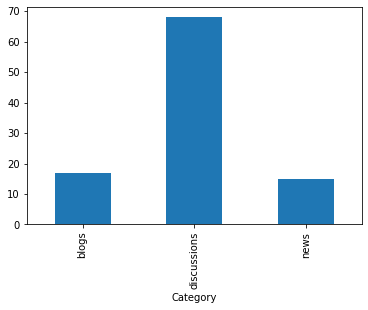

In [0]:
data.groupby('Category').category_id.count().plot.bar(ylim=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data['Text'].values.astype('U'))
labels = data.category_id

 

In [0]:
features.shape

(100, 107)

In [0]:
category_to_id.items()

dict_items([('news', 0), ('blogs', 1), ('discussions', 2)])

In [0]:
sorted(category_to_id.items())

[('blogs', 1), ('discussions', 2), ('news', 0)]

In [0]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
import numpy as np
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'blogs':
  . Most correlated unigrams:
       . number
       . place
       . easy
  . Most correlated bigrams:
       . little mix
       . quote quote
       . 13 november
# 'discussions':
  . Most correlated unigrams:
       . free
       . november
       . 13
  . Most correlated bigrams:
       . little mix
       . quote quote
       . 13 november
# 'news':
  . Most correlated unigrams:
       . year
       . home
       . said
  . Most correlated bigrams:
       . little mix
       . quote quote
       . 13 november


In [0]:
features_chi2

(array([9.90228620e-01, 3.52780396e-03, 6.24418938e+00, 2.09200857e+00,
        3.65645737e+00, 1.26293480e-03, 1.68944498e-01, 1.68944498e-01,
        3.92458313e-05, 7.85225400e-02, 6.25375390e-02, 1.68944498e-01,
        3.60564706e-01, 1.20979741e-01, 1.68944498e-01, 1.39556270e+00,
        1.20114573e-01, 1.52816133e+00, 7.29029837e-02, 9.85072979e-02,
        4.01733907e-02, 3.22375884e-02, 9.60948722e-03, 3.18460405e-01,
        7.19217025e-04, 3.22822217e-01, 3.63538423e+00, 2.88690427e-01,
        4.69042844e-01, 5.54448563e-01, 6.52837471e-01, 4.63559589e-02,
        7.54364587e-02, 1.20979741e-01, 1.20979741e-01, 1.20979741e-01,
        1.95245584e+00, 6.59487396e-03, 1.20979741e-01, 1.20979741e-01,
        5.98882401e-02, 4.33368897e-02, 1.29761522e+00, 5.58790622e-01,
        3.41606003e-01, 1.20979741e-01, 7.78766208e+00, 2.45918523e-01,
        5.09429365e-02, 5.96412968e-02, 1.68944498e-01, 1.53674289e+00,
        1.28128941e-01, 2.45718924e-01, 1.68944498e-01, 2.591979

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [0]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_data = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [0]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [0]:
cv_data = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

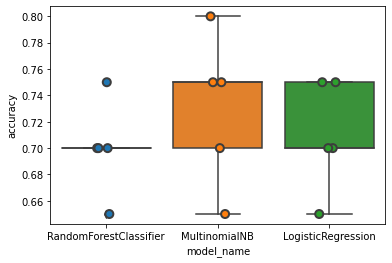

In [0]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_data)
sns.stripplot(x='model_name', y='accuracy', data=cv_data, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [0]:
# Mean accuracy of each algorithm
cv_data.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.71
MultinomialNB             0.73
RandomForestClassifier    0.70
Name: accuracy, dtype: float64

In [0]:
cv_data

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.65
1,RandomForestClassifier,1,0.70
2,RandomForestClassifier,2,0.70
3,RandomForestClassifier,3,0.75
4,RandomForestClassifier,4,0.70
5,MultinomialNB,0,0.65
6,MultinomialNB,1,0.70
7,MultinomialNB,2,0.75
8,MultinomialNB,3,0.80
9,MultinomialNB,4,0.75


In [0]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

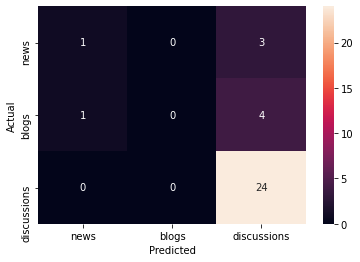

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_data.Category.values, yticklabels=category_id_data.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Failing  scenrios

In [0]:
from IPython.display import display

for predicted in category_id_data.category_id:
  for actual in category_id_data.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(data.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['Text'])
      print('')

'news' predicted as 'discussions' : 3 examples.


30    U.S. President Donald Trump's top economic adv...
43    icon-twitter\nIt’s that time of the year again...
60                                                     
Name: Text, dtype: object


'blogs' predicted as 'discussions' : 4 examples.


16    if(isset($_POST['btnsave']))\n{\n for($i=0; $i...
73    About me\nWelcome to my blog, tea-amour! This ...
7     ( google map ) QR Code Link to This Post I hav...
82    i really just u want to be the kind of girl th...
Name: Text, dtype: object